In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Importation

Data found on Refinitiv, the company is CostCo

In [63]:
excel_file_path = r"C:\Users\cleme\Downloads\Python Project\DATAPROJECT.xlsx"
stock_data = pd.read_excel(excel_file_path)

In [64]:
print("Head of the CSV file:")
print(stock_data.head())

Head of the CSV file:
        Date  ADJ Close
0 2023-11-24     589.08
1 2023-11-17     577.15
2 2023-11-10     577.12
3 2023-11-03     560.90
4 2023-10-27     543.03


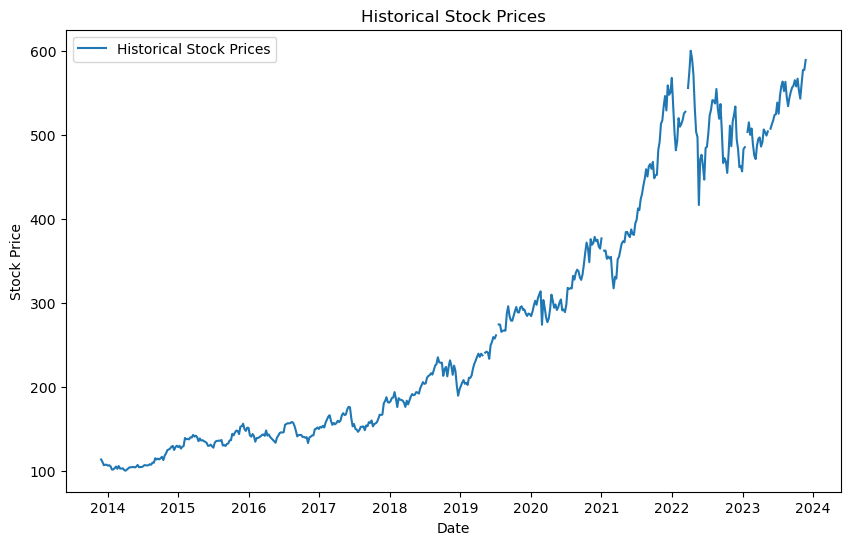

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['ADJ Close'], label='Historical Stock Prices')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Data Cleaning

Finding missing data and cleaning it.

In [66]:
missing_values_count = stock_data.isna().sum()
print("\nNumber of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
Date         0
ADJ Close    6
dtype: int64


In [67]:
stock_data = stock_data.dropna()

In [68]:
missing_values_count_after_cleaning = stock_data.isna().sum()
print("\nNumber of missing values in each column after cleaning:")
print(missing_values_count_after_cleaning)


Number of missing values in each column after cleaning:
Date         0
ADJ Close    0
dtype: int64


## Calculating Weekly Return

In [69]:
stock_data['Weekly_Return'] = stock_data['ADJ Close'].pct_change()

In [70]:
print(stock_data.head())

        Date  ADJ Close  Weekly_Return
0 2023-11-24     589.08            NaN
1 2023-11-17     577.15      -0.020252
2 2023-11-10     577.12      -0.000052
3 2023-11-03     560.90      -0.028105
4 2023-10-27     543.03      -0.031860


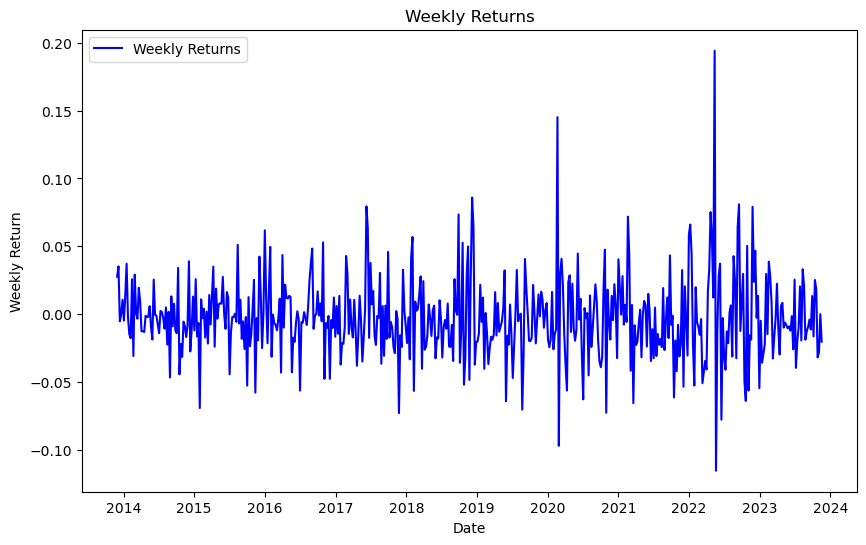

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Weekly_Return'], label='Weekly Returns', color='blue')
plt.title('Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Weekly Return')
plt.legend()
plt.show()

The following data was found on Refinitiv

In [72]:
risk_free_rate = 0.044841
beta = 0.7776
expected_market_return = 0.030778

###  CAPM Model

In [73]:
expected_stock_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)

In [74]:
last_known_price = stock_data['ADJ Close'].iloc[-1]
expected_stock_price = last_known_price * (1 + expected_stock_return)

In [75]:
print(f"Risk-Free Rate: {risk_free_rate}")
print(f"Stock Beta: {beta}")
print(f"Expected Market Return: {expected_market_return}")
print(f"Expected Stock Return: {expected_stock_return}")
print(f"Last Known Stock Price: {last_known_price}")
print(f"Expected Stock Price: {expected_stock_price}")

Risk-Free Rate: 0.044841
Stock Beta: 0.7776
Expected Market Return: 0.030778
Expected Stock Return: 0.0339056112
Last Known Stock Price: 113.712956
Expected Stock Price: 117.56846327453871


## Results

In [76]:
price_difference = expected_stock_price - last_known_price
percent_change = (price_difference / last_known_price) * 100

if price_difference > 0:
    upside_amount = price_difference
    downside_amount = 0
    upside_percent = percent_change
    downside_percent = 0
else:
    upside_amount = 0
    downside_amount = -price_difference
    upside_percent = 0
    downside_percent = -percent_change

print("\nUpside/Downside Analysis:")
print(f"Upside Amount: {upside_amount}")
print(f"Upside Percent: {upside_percent:.2f}%")
print(f"Downside Amount: {downside_amount}")
print(f"Downside Percent: {downside_percent:.2f}%")


Upside/Downside Analysis:
Upside Amount: 3.8555072745387093
Upside Percent: 3.39%
Downside Amount: 0
Downside Percent: 0.00%


In [77]:
if expected_stock_price > last_known_price:
    recommendation = "Buy"
elif expected_stock_price < last_known_price:
    recommendation = "Sell"
else:
    recommendation = "Hold"

print(f"\nRecommendation: {recommendation}")


Recommendation: Buy
